<a href="https://colab.research.google.com/github/hyeonjusong410/DL.Basic/blob/main/Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import string

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [10]:
path = "./gdrive/MyDrive/Colab Notebooks/"
path_to_wikipedia = path + "wikipedia2text-extracted.txt"
with open(path_to_wikipedia, "rb") as f:
    wikipedia = f.read().decode()
    wikipedia = wikipedia.lower()
print(str(len(wikipedia)) + " character(s)")

63291831 character(s)


In [11]:
import re

# keep alphabet + spaces
wikipedia = re.sub("[^ a-z]", "", wikipedia) # 총 27개의 글자를 사용하는 것

In [12]:
from itertools import zip_longest

str_len = 25
# using all data is like 30 gigs in numpy array form
percent_of_data_to_use = 0.05

wiki_ls = [''.join(filter(None, s)) for s in zip_longest(*([iter(wikipedia)]*(str_len-1)))]
wiki_ls = wiki_ls[:-1] if len(wiki_ls[-1]) != str_len else wiki_ls

wiki_ls = wiki_ls[:int(len(wiki_ls) * percent_of_data_to_use)]

In [13]:
ALPHA = "abcdefghijklmnopqrstuvwxyz "
IND_LOOKUP = {x:i for i, x in enumerate(ALPHA)}
LOOKUP_TABLE = np.array([x for x in ALPHA])
LOOKUP_TABLE = np.concatenate([np.roll(LOOKUP_TABLE, i)[None] for i in range(0, -len(ALPHA), -1)], axis=0)

In [14]:
LOOKUP_TABLE

array([['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
        'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',
        ' '],
       ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n',
        'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ',
        'a'],
       ['c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o',
        'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', 'a',
        'b'],
       ['d', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
        'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', 'a', 'b',
        'c'],
       ['e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q',
        'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', 'a', 'b', 'c',
        'd'],
       ['f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r',
        's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', 'a', 'b', 'c', 'd',
        'e'],
       ['g', 'h', 'i', 'j', 'k', 'l', 'm

In [15]:
# Encryption
def cipher(plaintext, key):
    len_p = len(plaintext)
    len_k = len(key)

    key = (key * (len_p // len_k + 1))[:len_p]
    out = ""
    for p, k in zip(plaintext, key):
        ind_p = IND_LOOKUP[p]
        ind_k = IND_LOOKUP[k]

        out += LOOKUP_TABLE[ind_k, ind_p]
    return out


In [16]:
key = "clap"

wiki_enc_ls = [cipher(x, key) for x in wiki_ls]

In [17]:
wiki_enc_ls

['rbodcrabfl xukaoeznrgbtt',
 'fkstvkoubxegulgtukaxopdo',
 'cd xpqligycxpr hjp crtnx',
 'qysoqb qgsajkzroqq  cbgt',
 'byuadprgbzforpodnp xpctt',
 'co chkiarlrhkll  kpfqfis',
 'kygokyfctxahkznorbodcrab',
 'fl xpkihukmcud qccirbceb',
 'up dtpstpdsokyfctxahkzno',
 'ky ctoefbdookyf wpnrgkih',
 'ukaiftebep hjp aqctogqft',
 'edijgkpfq avcydpbtsoqqtt',
 'pkcco ltvplmbdrivsfinkbi',
 'vkscop dtzppilnsckpfgceb',
 'vc ucntgbce gntxxplmbdoo',
 'gyccwbavgkaorlrhknu cb g',
 ' ytwgcigbzroitvtuklccoes',
 'bxegulgtukibbzrsgb hqkpf',
 'qourgkabbpmcvtobcw fcdht',
 'tktwcy fcdicpllotpsdqyst',
 'bdoovseokyfctxahkznorbeg',
 'gyttfktwgkdtutrtfkrtuelh',
 'btsockcwcygtbzfovseoezgb',
 'kdijgknptbahkfeoqq hjp g',
 'wmjted xpktwgktptrehblus',
 'kpnrgdhtbgoffkofkribcdeg',
 'bqrcoktwgklpvtnoplmtbnob',
 'ibevcdicboeorbodcrabfl u',
 'koeoeznvtpgpvtobbqofbdht',
 'bcpfgldxpr chktwgkfpkdho',
 'qq pbnobibevcdicpkfcwydt',
 'fkbmb odgkgfgrof kxjbtno',
 'bchctdlmblfhgb hjp gvlrh',
 'bzfovseovsifvi mglrgbgaf',
 'bdhxukdtrlrh

In [18]:
def one_hot_encoding(text):
    """
    adds both a start and end token
    """
    seq_len = len(text)
    # +2 to seq_len to add in start/end tokens, +2 to dimension to account for new start/end tokens
    # start = [... 0 1 0], end = [... 0 0 1]
    out = np.zeros((seq_len+2, len(ALPHA)+2), dtype=np.float32)
    inds = [IND_LOOKUP[x] for x in text]
    out[range(1, seq_len+1), inds] = 1
    out[0, -2] = 1
    out[-1, -1] = 1
    return out


In [19]:
# src one-hots dont need start token : train
wiki_src_dat = np.concatenate([one_hot_encoding(x)[1:, None] for x in wiki_enc_ls], axis=1)

# tgt one-hots dont need end token : target
wiki_tgt_dat = np.concatenate([one_hot_encoding(x)[:-1, None] for x in wiki_ls], axis=1)

print(wiki_src_dat.shape, wiki_tgt_dat.shape)

# context len : 25
# wiki text file context num : 125905
# token num : 29 (Alphabet + end + start)

(25, 125905, 29) (25, 125905, 29)


In [24]:
wiki_tgt_inds = np.concatenate([np.array([IND_LOOKUP[x] for x in tgt_str] + [len(ALPHA) + 1]).reshape(-1, 1)
for tgt_str in wiki_ls], axis=1)

print(wiki_tgt_inds.shape)

(25, 125905)


In [27]:
test_dat = ["i love you so much honey",
"blahblahblahblahblahblah"]
# char num = 24. why? sum start token '~'

test_dat = [cipher(x, key) for x in test_dat]
test_dat = np.concatenate([one_hot_encoding(x)[1:, None] for x in test_dat], axis=1)

print(test_dat.shape)

(25, 2, 29)


In [28]:
np.savez("wikipedia2text-encoded.npz",
train_src_one_hot=wiki_src_dat,
train_tgt_one_hot=wiki_tgt_dat,
train_truth_inds=wiki_tgt_inds,
test_src_one_hot=test_dat)

# Train Data

In [29]:
with np.load("wikipedia2text-encoded.npz") as data:
    train_src_one_hot = data["train_src_one_hot"]
    train_tgt_one_hot = data["train_tgt_one_hot"]
    train_truth_inds = data["train_truth_inds"]
    test_src_one_hot = data["test_src_one_hot"]

# 여기에 코드 작성
print(train_src_one_hot.shape, train_tgt_one_hot.shape,
      train_truth_inds.shape, test_src_one_hot.shape)

(25, 125905, 29) (25, 125905, 29) (25, 125905) (25, 2, 29)


# Multihead Attention

In [31]:
class MultiheadAttention(nn.Module):
    def __init__(self, dim, n_head=3):

        super().__init__()
        # self.Wq : glorot-normal
        # (h, d, d // h)
        self.Wq = nn.Parameter(torch.Tensor(n_head, dim, dim // n_head))
        nn.init.xavier_normal_(self.Wq)

        # self.Wk : glorot-normal
        # (h, d, d // h)
        self.Wk = nn.Parameter(torch.Tensor(n_head, dim, dim // n_head))
        nn.init.xavier_normal_(self.Wk)

        # self.Wv : glorot-normal
        # (h, d, d // h)
        self.Wv = nn.Parameter(torch.Tensor(n_head, dim, dim // n_head))
        nn.init.xavier_normal_(self.Wv)

        # self.Wo :  pytorch FCN layer
        # (t, N, h * [d // h]) -> (t, N, d)
        # lorot_normal
        self.Wo = nn.Linear(n_head * (dim // n_head), dim, bias=False)
        nn.init.xavier_normal_(self.Wo.weight)

    def forward(self, Q, K, V, mask=None):
      # einsum
        Q_i = torch.einsum('tNd,hdk->tNhk', Q, self.Wq)
        K_i = torch.einsum('TNd,hdk->TNhk', K, self.Wk)
        V_i = torch.einsum('TNd,hdk->TNhk', V, self.Wv)

        E = torch.einsum('tNhk,TNhk->tNhT', Q_i, K_i) / np.sqrt(self.Wk.shape[-1])

        # mask
        if mask is not None:
            E = E.masked_fill(mask.unsqueeze(1).unsqueeze(1) == 0, -1e14)

        self.a_ij = F.softmax(E, dim=-1) # alpha : E softmax

        C = torch.einsum('tNhT,TNhv->tNhv', self.a_ij, V_i)

        # (t, N, h, d // h) -> (t, N, h * [d // h])
        out = C.reshape(C.shape[0], C.shape[1], -1)
        result = self.Wo(out)

        return result

# Encoder

In [32]:
class ResidualConnectionAndLayerNorm(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.g = nn.Parameter(torch.ones(dim))
        self.b = nn.Parameter(torch.zeros(dim))

    def forward(self, x_old, x_new):
        # add : residual connection
        x = x_old + x_new
        # norm
        mu = x.mean(dim=-1, keepdim=True)
        sigma = x.std(dim=-1, keepdim=True)
        return self.g * (x - mu) / (sigma + 1e-6) + self.b

# FeeForward Class

In [41]:
class FeedForward(nn.Module):
    def __init__(self, in_dim, h_dim, out_dim):
        super().__init__()
        # torch.nn Linear
        self.W1 = nn.Linear(in_dim, h_dim)
        self.W2 = nn.Linear(h_dim, out_dim)

    def forward(self, x):
        out = self.W1(x)
        out = F.relu(out)
        out = self.W2(out)
        return out

# TransformerEncoder Class

In [42]:
class TransformerEncoder(nn.Module):
    def __init__(self, dim, h_dim, n_head=3):
        super().__init__()
        # 여기에 코드 작성
        self.self_attn = MultiheadAttention(dim, n_head)
        self.ff = FeedForward(dim, h_dim, dim)
        self.norm1 = ResidualConnectionAndLayerNorm(dim)
        self.norm2 = ResidualConnectionAndLayerNorm(dim)

    def forward(self, src):
        X1 = self.self_attn(src, src, src) # MultiheadAttention
        # Q, K, V same values (scr)

        X2 = self.norm1(src, X1) # Add & Norm
        #  x_old + x_new

        X3 = self.ff(X2) # FeedForward

        return self.norm2(X2, X3) # Add & Norm
        #  x_old + x_new
# mask X

# TranseFormer Decoder

In [43]:
class TransformerDecoder(nn.Module):
    def __init__(self, dim, h_dim, n_head=3):
        super().__init__()
        self.self_attn = MultiheadAttention(dim, n_head)
        self.enc_dec_attn = MultiheadAttention(dim, n_head)
        self.ff = FeedForward(dim, h_dim, dim)
        self.norm1 = ResidualConnectionAndLayerNorm(dim)
        self.norm2 = ResidualConnectionAndLayerNorm(dim)
        self.norm3 = ResidualConnectionAndLayerNorm(dim)

    def forward(self, enc_out, tgt):
        t = tgt.shape[0]
        mask = torch.tril(torch.ones((t, t))).to(torch.bool)

        X1 = self.self_attn(tgt, tgt, tgt, mask=mask)

        X2 = self.norm1(tgt, X1)

        X3 = self.enc_dec_attn(X2, enc_out, enc_out) # MultiheadAttention(mask X)

        X4 = self.norm2(X2, X3)

        X5 = self.ff(X4)

        return self.norm3(X4, X5)

In [44]:
t = 5
mask = torch.tril(torch.ones((t, t))).to(torch.bool)
mask

tensor([[ True, False, False, False, False],
        [ True,  True, False, False, False],
        [ True,  True,  True, False, False],
        [ True,  True,  True,  True, False],
        [ True,  True,  True,  True,  True]])

# Positional Encoder

In [45]:
class PositionalEncoder(nn.Module):
    def __init__(self, dim, max_len=5000):
        super().__init__()
        self.dim = dim

        pe = torch.zeros(max_len, dim)
        # Generating positional index max_len
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)

        div_term = torch.exp(torch.arange(0, dim, 2).float() * (-np.log(10000.0) / dim))

        pe[:, 0::2] = torch.sin(position * div_term)

        if dim % 2 == 1:
            pe[:, 1::2] = torch.cos(position * div_term[:-1])
        else:
            pe[:, 1::2] = torch.cos(position * div_term)

        pe = pe.unsqueeze(1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return self.pe[:x.size(0), :x.size(1), :]

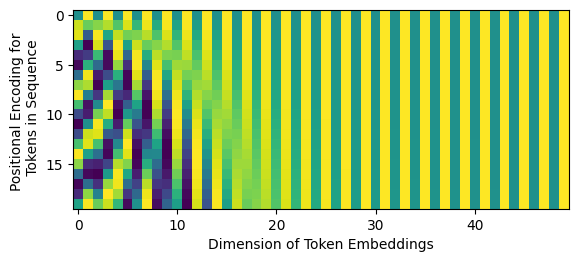

In [46]:
C = 50 # 토큰의 임베딩 크기
T = 20 # 시퀀스 길이

pos = PositionalEncoder(C)

fig, ax = plt.subplots()

# 입력 텐서를 생성하여 PositionalEncoder에 전달
input_tensor = torch.zeros((T, 1, C))

# 도식화할 때 배치가 갖는 차원을 없애기 위해 squeeze 적용
ax.imshow(pos(input_tensor).squeeze())

ax.set_xlabel("Dimension of Token Embeddings")
ax.set_ylabel("Positional Encoding for \n Tokens in Sequence")

plt.show()

# Transformer

In [47]:
class Transformer(nn.Module):
    def __init__(self, dim, h_dim, n_enc, n_dec, n_head=3):
        super().__init__()
        self.pos_enc = PositionalEncoder(dim)

        self.enc_layers = nn.ModuleList([TransformerEncoder(dim, h_dim, n_head) for _ in range(n_enc)])
        self.dec_layers = nn.ModuleList([TransformerDecoder(dim, h_dim, n_head) for _ in range(n_dec)])

        self.out_dense = nn.Linear(dim, dim)
        nn.init.xavier_normal_(self.out_dense.weight)

    def forward(self, src, tgt):
        src = src + self.pos_enc(src)
        for enc in self.enc_layers:
            src = enc(src)
        enc_out = src
        tgt = tgt + self.pos_enc(tgt)
        for dec in self.dec_layers:
            tgt = dec(enc_out, tgt)

        return self.out_dense(tgt)

In [49]:
d = train_src_one_hot.shape[-1]
# Transformer의 feedforward 은닉 차원
h_dim = 30
# 인코더 층 개수
n_enc = 2
# 디코더 층 개수
n_dec = 2
# 어텐션 헤드 개수
n_head = 4

# numpy로 되어 있는 데이터를 torch의 Tensor로 변경해주어야 모델과 옵티마이저로 입력이 가능하다.
if isinstance(train_src_one_hot, np.ndarray):
  train_src_one_hot = torch.from_numpy(train_src_one_hot)
if isinstance(train_tgt_one_hot, np.ndarray):
  train_tgt_one_hot = torch.from_numpy(train_tgt_one_hot)
if isinstance(train_truth_inds, np.ndarray):
  train_truth_inds = torch.from_numpy(train_truth_inds).long()


model = Transformer(dim=d, h_dim=h_dim, n_enc=n_enc, n_dec=n_dec, n_head=n_head)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [50]:
batch_size = 10
num_epochs = 1

dataset_size = train_src_one_hot.shape[1]

for epoch_cnt in range(num_epochs):
    idxs = np.arange(dataset_size)
    np.random.shuffle(idxs)

    for batch_cnt in range(0, dataset_size // batch_size):
        # adjusting the lr seems to help speed up
        # convergence a bit but it isn't really necessary
        if batch_cnt == 7500:
            optimizer = optim.Adam(model.parameters(), lr=1e-5)

        batch_indices = idxs[batch_cnt * batch_size : (batch_cnt + 1) * batch_size]

        # since the data are shape (T, N, ...), we need to
        # index into the 1st dimension with `batch_indices`
        src_batch = train_src_one_hot[:, batch_indices]
        tgt_batch = train_tgt_one_hot[:, batch_indices]
        truth_batch = train_truth_inds[:, batch_indices]

        pred = model(src_batch, tgt_batch)

        pred = pred.view(-1, pred.shape[-1])
        truth_batch = truth_batch.view(-1)

        loss = criterion(pred, truth_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        acc = (pred.argmax(dim=1) == truth_batch).float().mean().item()


        if batch_cnt % 1000 == 0 and batch_cnt > 0:
            print(f"Batch {batch_cnt}: Loss = {loss.item()}, Accuracy = {acc}")


Batch 1000: Loss = 2.138211727142334, Accuracy = 0.36399999260902405
Batch 2000: Loss = 0.22686277329921722, Accuracy = 0.9359999895095825
Batch 3000: Loss = 0.05368296056985855, Accuracy = 0.9919999837875366
Batch 4000: Loss = 0.026406733319163322, Accuracy = 0.9959999918937683
Batch 5000: Loss = 0.028379829600453377, Accuracy = 0.9959999918937683
Batch 6000: Loss = 0.017412284389138222, Accuracy = 0.9959999918937683
Batch 7000: Loss = 0.08131281286478043, Accuracy = 0.984000027179718
Batch 8000: Loss = 0.001434648991562426, Accuracy = 1.0
Batch 9000: Loss = 0.0012620610650628805, Accuracy = 1.0
Batch 10000: Loss = 0.0007397083682008088, Accuracy = 1.0
Batch 11000: Loss = 0.0009619443444535136, Accuracy = 1.0
Batch 12000: Loss = 0.000830756442155689, Accuracy = 1.0


In [51]:
# 추론을 위해 ‘greedy decoding’을 활용
test_src_one_hot = torch.from_numpy(test_src_one_hot)
test_tgt_one_hot = torch.zeros_like(test_src_one_hot)
test_tgt_one_hot[0, :, -2] = 1  # 모든 시퀀스를 시작 토큰(start token)으로 시작하도록 한다.

test_src_one_hot = test_src_one_hot.to(torch.float32)
test_tgt_one_hot = test_tgt_one_hot.to(torch.float32)

model.eval()  # 추론 모드로 전환

with torch.no_grad():  # 그래디언트 계산 비활성화
    for i in range(len(test_tgt_one_hot)-1):
        # 타켓 시퀀스에서 첫 번째 ‘i’ 토큰들에 접근
        tgt = test_tgt_one_hot[:i+1]

        # 완전한 소스 시퀀스와 전체에서 일부만 존재하는 타겟 시퀀스 보내기
        pred = model(test_src_one_hot, tgt)

        # `i+1`번째 토큰을 가장 예측 점수가 높은 토큰으로 업데이트
        ind = pred[-1].argmax(dim=-1)
        test_tgt_one_hot[i+1, range(len(ind)), ind] = 1

In [52]:
import string

# 다음의 것으로 알파벳을 정의하자: ` ` = space, ~ = start, ! = stop
ALPHA_STA_STO = string.ascii_lowercase + " ~!"

decoded_str = []

# batch가 갖는 차원에 맞게 반복
for seq_one_hot in test_tgt_one_hot.transpose(1, 0):
    # 시퀀스의 one-hot 인코딩에 기초에 알파벳으로 인덱스하기
    seq_text = "".join([ALPHA_STA_STO[i] for i in seq_one_hot.argmax(dim=-1).cpu().numpy()])
    decoded_str.append(seq_text)

decoded_str

['~i love you so much honey', '~blahblalblahblahblahblah']